In [1]:
import flexES as ES
import numpy as np
import matplotlib.pyplot as plt
import importlib 
importlib.reload(ES)
import scipy.stats as stats

TypeError: 'str' object is not callable

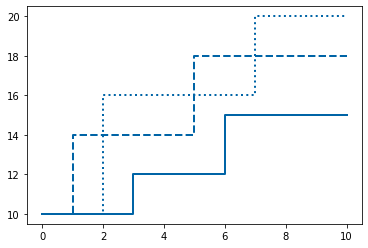

In [7]:
## Plot different capacity vectors

t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

FR1 = np.array([10, 10, 10, 12, 12, 12, 15, 15, 15, 15, 15])
FR2 = np.array([10, 10, 16, 16, 16, 16, 16, 20, 20, 20, 20])
FR3 = np.array([10, 14, 14, 14, 14, 18, 18, 18, 18, 18, 18])

linestyle = ['solid', 'dotted', 'dashed', 'dashdot']
lbl = ['$K_1$', '$K_2$', '$K_3$']

plt.step(t, FR1, label=lbl[0], color='#0064A6', linestyle=linestyle[0], where='post', linewidth=2)
plt.step(t, FR2, label=lbl[1], color='#0064A6', linestyle=linestyle[1], where='post', linewidth=2)
plt.step(t, FR3, label=lbl[2], color='#0064A6', linestyle=linestyle[2], where='post', linewidth=2)

plt.ylabel('Capacity $K$', fontsize=12, fontweight='bold')
plt.xlabel('Planning Phase $t$', fontsize=12, fontweight='bold')
plt.grid()
plt.legend()

plt.savefig('Facility_Requirement.pdf', bbox_inches='tight')

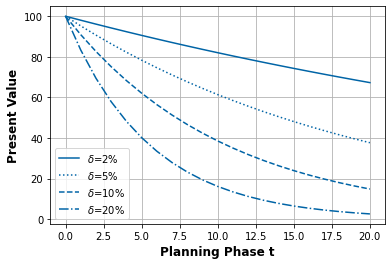

In [20]:
## Impact of different discount rates

t = np.linspace(0,20,21)
discount = np.array([0.02, 0.05, 0.1, 0.2])

linestyle = ['solid', 'dotted', 'dashed', 'dashdot']



V_t = 100 * np.ones_like(t)


for idx, r in enumerate(discount):
    PV = V_t / (1 + r)**t
    plt.plot(t,PV, label='$\delta$='+str(round(r*100))+'%', color='#0064A6', linestyle=linestyle[idx])

plt.ylabel('Present Value', fontsize=12, fontweight='bold')
plt.xlabel('Planning Phase t', fontsize=12, fontweight='bold')
plt.grid()
plt.legend()

plt.savefig('present_value.pdf', bbox_inches='tight')


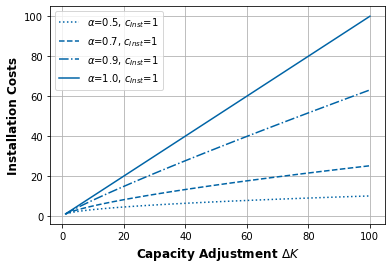

In [35]:
## Plotting Economies of Scale effects

deltaK = np.linspace(1,100,101)
alpha = np.array([0.5, 0.7, 0.9, 1])
c_inst  = 1

linestyle = ['dotted', 'dashed', 'dashdot', 'solid']

for idx, a in enumerate(alpha):
    C = deltaK**a * c_inst
    plt.plot(deltaK,C, label='$\\alpha$='+str(a)+', $c_{Inst}$=1', color='#0064A6', linestyle=linestyle[idx])


plt.ylabel('Installation Costs', fontsize=12, fontweight='bold')
plt.xlabel('Capacity Adjustment $\Delta K$', fontsize=12, fontweight='bold')
plt.grid()
plt.legend()

plt.savefig('eos.pdf', bbox_inches='tight')

In [19]:
def skew_norm_pdf(x,e=0,w=1,a=0):
    # adapated from:
    # http://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(a*t)

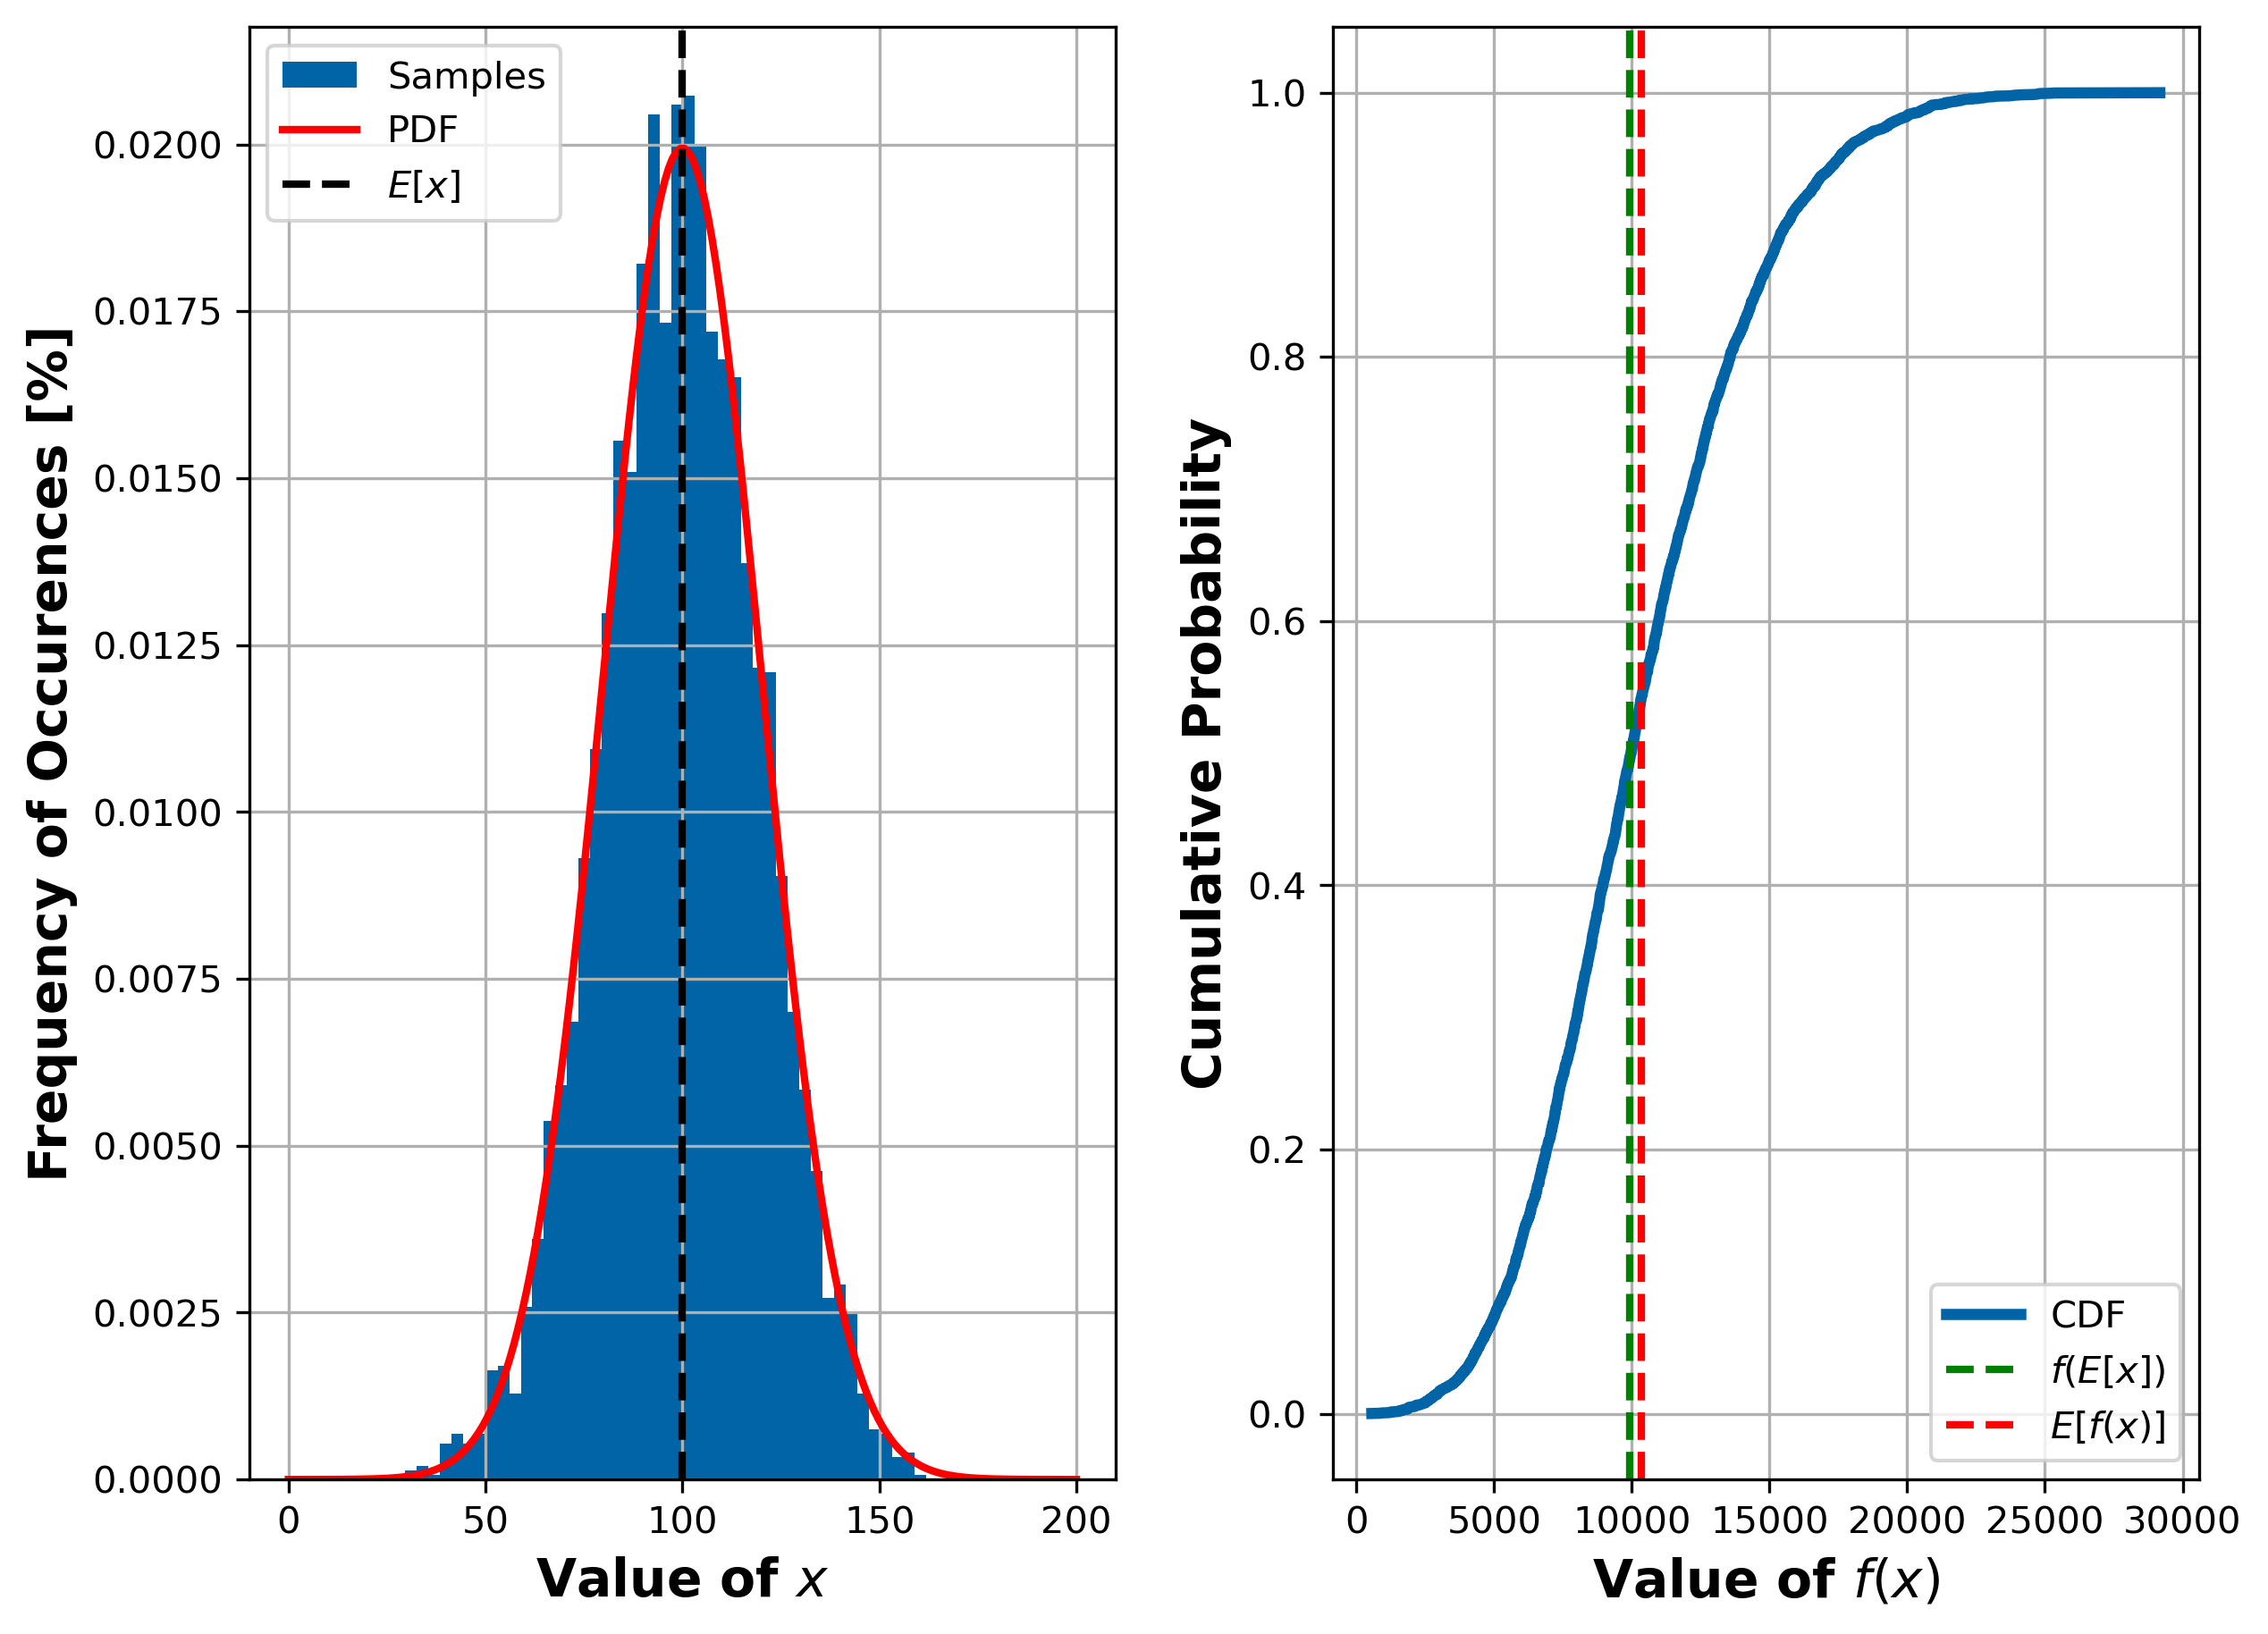

In [50]:
## Flaw of averages E[f(x)] <> f(E[x]) if f(x) is not a linear function
mu = 100
sigma = 20
x = np.random.normal(mu, sigma, 5000)
#x = np.random.weibull(mu, 5000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), dpi=300)
fig.tight_layout()


ax1.hist(x, 50, density=True, color='#0064A6', label='Samples')

tmp = np.linspace(0, 200, 200)
p = stats.norm.pdf(tmp, mu, sigma)
ax1.plot(tmp, p, 'r', linewidth=2, label='PDF')

ax1.axvline(mu, color='k', linestyle='dashed', linewidth=2, label='$E[x]$')

ax1.grid()
ax1.set_xlabel('Value of $x$', fontsize = 14, fontweight='bold')
ax1.set_ylabel('Frequency of Occurences [%]', fontsize = 14, fontweight='bold')
ax1.legend(loc='upper left')


y = x**2
ax2.plot(np.sort(y),np.arange(1,len(y)+1)/float(len(y)),
        linestyle='solid',
        linewidth=3,
        color='#0064A6',
        label='CDF',
        alpha=1)

ax2.axvline((np.mean(x))**2, color='g', linestyle='dashed', linewidth=2, label='$f(E[x])$')
ax2.axvline(np.mean(y), color='r', linestyle='dashed', linewidth=2, label='$E[f(x)]$')


ax2.grid()
ax2.set_xlabel('Value of $f(x)$', fontsize = 14, fontweight='bold')
ax2.set_ylabel('Cumulative Probability', fontsize = 14, fontweight='bold')
ax2.legend(loc='lower right')

plt.subplots_adjust(wspace=0.25)
plt.savefig('flaw_of_averages.pdf', bbox_inches='tight')




In [23]:
np.mean(y)

0.9887239077909976

In [2]:
## Generate scenarios

x0 = 100
mu = 0.02
sigma = 0.1
scenarios = 5000
periods = 30
dt = 1

D = ES.gbm(x0 = x0, mu=mu, sigma=sigma, n_p=periods, n_s=scenarios, dt=dt)
t = np.arange(0, periods+1, dt)



/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_76872/470252478.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


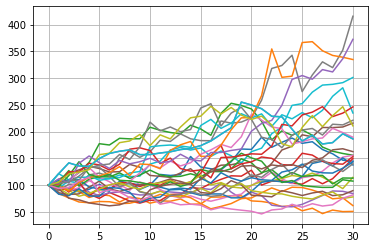

In [3]:
# Select number of scenarios to plot
n_plot = 30

# Generate random requence of scenario ids to plot
rand_scen = np.squeeze(np.random.randint(0,scenarios, size=(1,n_plot)))

fig = plt.figure()
plt.plot(D[rand_scen, :].T)
plt.grid()
plt.xlabel = 'Time'
plt.ylabel = 'Demand'
fig.show()


In [4]:
def getK(K0=0, schedule={}, periods=10, scenarios=1):

    # Create capacity vector
    K = K0 * np.ones((1,periods+1))

    # Implement schedule
    for t in schedule:
        K[:,t:]=K[0,t]+schedule[t]

    deltaK = np.diff(K, axis=1, prepend=K0)

    # Change size of K to match size of scenarios
    K = np.repeat(K,scenarios,axis=0)
    deltaK = np.repeat(deltaK,scenarios,axis=0)

    return K, deltaK



In [5]:
## Generate Capacity Vectors on basis of K0 and expansion schedule

deltaK0 = 0     # Capacity change at t=0
K0 = 5          # Capacity at t=0

# Capacity vectors
K1 = getK(K0, schedule = {5:2, 10:5}, periods=periods, scenarios=scenarios)
K2 = getK(K0, schedule = {6:10, 22:7}, periods=periods, scenarios=scenarios)


K = [K1[0], K2[0]]
deltaK = [K1[1], K2[1]]





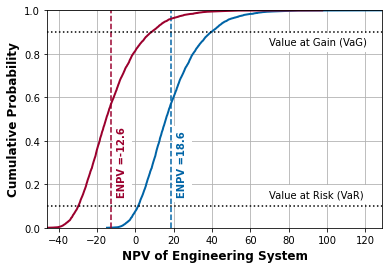

In [42]:
# NPV

r_D = 0.03      # Revenues per Unit of Demand per Period
r_K = 0.03      # Revenues per Unit of Capacity per Period

co_K = 0.01     # Operational costs per unit of capacity per period
co_D = 0.004    # Operational cost per unit of demand per period

ci_K = 10       # Installation cost per unit of capacity

discount = 0.05 # Discount factor
EoS = 0.85      # EoS factor

NPV=list()


color = ['#0064A6', '#9B002D']
label = ['Target Curve K1', 'Target Curve K2']

fig = plt.figure()


for i in range(len(K)):
    # Revenue
    R = r_D * D + r_K * K[i]

    # Cost
    # Investment costs
    CI = ci_K * deltaK[i]**EoS

    # Operational costs
    CO = co_K * K[i] + co_D * D

    C = CI + CO

    # Profits
    P = R - C

    # Discount
    PV = (1/(1+discount)**t)*P

    NPV.append(np.sum(PV,axis=1))
    
    plt.plot(np.sort(NPV[i]),np.arange(1,len(NPV[i])+1)/float(len(NPV[i])),
        linestyle='solid',
        linewidth=2,
        color=color[i],
        label=label[i],
        alpha=1)
    
    plt.axvline(np.mean(NPV[i]), color=color[i], linestyle='dashed', linewidth=1.5)
    
    plt.annotate('ENPV ='+str(round(np.mean(NPV[i]),1)),
                 xy=(np.mean(NPV[i]), 0.15), xycoords='data',
                 xytext=(np.mean(NPV[i])+3, 0.15), textcoords='data',
                 rotation=90, fontsize= 10, fontweight='bold', color=color[i],
                 bbox=dict(facecolor='white', edgecolor='white'))


plt.hlines(0.9, np.min(NPV), np.max(NPV), color='k', linestyle='dotted', linewidth=1.5)
plt.hlines(0.1, np.min(NPV), np.max(NPV), color='k', linestyle='dotted', linewidth=1.5)

plt.annotate('Value at Gain (VaG)',
             xy=(70, 0.84), xycoords='data',
             xytext=(70, 0.84), textcoords='data',
             rotation=0, fontsize= 10, color='k',
             bbox=dict(facecolor='white', edgecolor='white'))

plt.annotate('Value at Risk (VaR)',
             xy=(70, 0.14), xycoords='data',
             xytext=(70, 0.14), textcoords='data',
             rotation=0, fontsize= 10, color='k',
             bbox=dict(facecolor='white', edgecolor='white'))
    
plt.ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
plt.xlabel('NPV of Engineering System', fontsize=12, fontweight='bold')

plt.ylim((0,1))
plt.xlim((np.min(NPV), np.max(NPV)))
plt.grid()



plt.savefig('target_curves.pdf', bbox_inches='tight')


In [7]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)